In [694]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [695]:
from downstream.mdd.dataset import L2ArcticDataset
from downstream.augment_utils.phase_perturbation import PhasePerturbation

In [696]:
import yaml
import torch
import torchaudio
from matplotlib import pyplot as plt
import IPython

In [697]:
with open("./downstream/mdd/config.yaml") as f:
    config = yaml.safe_load(f)

In [698]:
dataset = L2ArcticDataset("train", **config["downstream_expert"]["datarc"])

Skipping malformatted TextGrid file: /home/xt0r3-user/cambridge/partii/dissertation/s3prl/data/l2arctic_release_v5.0/YDCK/annotation/arctic_a0272.TextGrid
Skipping malformatted TextGrid file: /home/xt0r3-user/cambridge/partii/dissertation/s3prl/data/l2arctic_release_v5.0/YDCK/annotation/arctic_a0209.TextGrid


In [699]:
orig_wavs = [dataset[x][0] for x in range(32)]

In [700]:
perturb = PhasePerturbation(0.3, 2**10, hop_length=32)
wavs = perturb(orig_wavs)

In [701]:
[orig_wav - wav for (orig_wav, wav) in zip(orig_wavs, wavs)]

[tensor([ 2.2860e-04, -5.0301e-05, -1.7202e-04,  ...,  7.4565e-04,
          5.8399e-04,  4.1810e-04]),
 tensor([ 0.0014,  0.0020,  0.0017,  ..., -0.0023, -0.0020, -0.0021]),
 tensor([ 0.0105,  0.0126,  0.0107,  ..., -0.0017, -0.0018, -0.0024]),
 tensor([-0.0015, -0.0011, -0.0010,  ..., -0.0013, -0.0012, -0.0015]),
 tensor([ 2.5648e-04, -7.1397e-05, -1.5045e-04,  ...,  5.2224e-04,
          8.5660e-04,  1.0112e-03]),
 tensor([-0.0017, -0.0020, -0.0018,  ..., -0.0031, -0.0032, -0.0021]),
 tensor([ 1.9206e-03,  2.2954e-03,  1.9664e-03,  ...,  3.8460e-05,
         -1.8473e-04, -4.3399e-04]),
 tensor([-0.0092, -0.0094, -0.0072,  ...,  0.0020,  0.0021,  0.0023]),
 tensor([-0.0026, -0.0024, -0.0022,  ..., -0.0036, -0.0037, -0.0033]),
 tensor([-0.0009, -0.0004, -0.0002,  ..., -0.0051, -0.0051, -0.0047]),
 tensor([-1.3091e-04, -3.7416e-05, -3.4499e-05,  ...,  2.9629e-04,
          3.5919e-04,  4.0861e-04]),
 tensor([0.0011, 0.0013, 0.0011,  ..., 0.0006, 0.0006, 0.0006]),
 tensor([-0.0027, -0.0

In [702]:
wavs

[tensor([0.0007, 0.0010, 0.0008,  ..., 0.0036, 0.0028, 0.0023]),
 tensor([ 0.0083,  0.0138,  0.0131,  ..., -0.0042, -0.0031, -0.0039]),
 tensor([0.0134, 0.0232, 0.0198,  ..., 0.0096, 0.0099, 0.0076]),
 tensor([ 0.0008, -0.0006, -0.0017,  ..., -0.0080, -0.0077, -0.0090]),
 tensor([-0.0024, -0.0034, -0.0031,  ..., -0.0165, -0.0166, -0.0185]),
 tensor([-0.0117, -0.0177, -0.0146,  ..., -0.0125, -0.0135, -0.0072]),
 tensor([0.0103, 0.0162, 0.0141,  ..., 0.0026, 0.0020, 0.0008]),
 tensor([-0.0056, -0.0161, -0.0123,  ...,  0.0052,  0.0058,  0.0068]),
 tensor([ 0.0048,  0.0063,  0.0054,  ..., -0.0286, -0.0291, -0.0253]),
 tensor([0.0031, 0.0043, 0.0040,  ..., 0.0059, 0.0039, 0.0022]),
 tensor([ 0.0014,  0.0016,  0.0020,  ..., -0.0035, -0.0033, -0.0023]),
 tensor([ 0.0040,  0.0063,  0.0057,  ..., -0.0013, -0.0006, -0.0009]),
 tensor([ 0.0069,  0.0091,  0.0083,  ..., -0.0119, -0.0122, -0.0128]),
 tensor([ 0.0005,  0.0065,  0.0061,  ..., -0.0150, -0.0167, -0.0116]),
 tensor([0.0065, 0.0113, 0.009

In [703]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

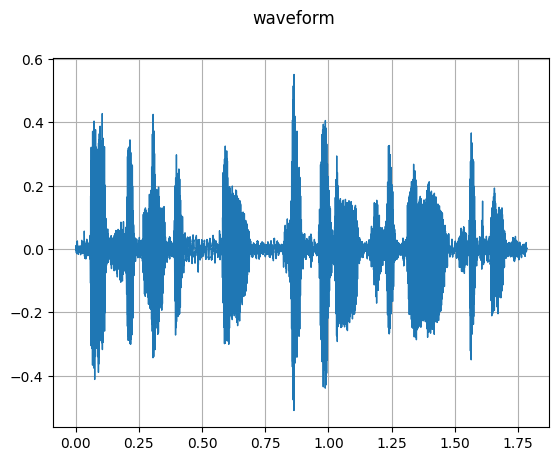

In [704]:
plot_waveform(orig_wavs[0].unsqueeze(0), 44100)

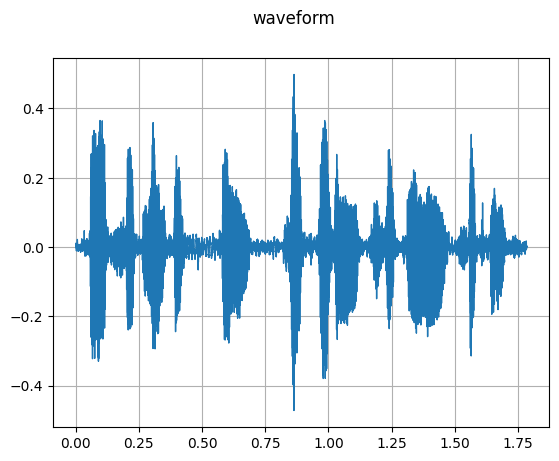

In [705]:
plot_waveform(wavs[0].unsqueeze(0), 44100)

In [706]:
metadata = torchaudio.info(
    "/home/xt0r3-user/cambridge/partii/dissertation/s3prl/data/l2arctic_release_v5.0/ABA/wav/arctic_a0121.wav"
)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=189145, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [707]:
num_wav = 0


n_fft = 2**8
hop_length = 100
baseline = torch.istft(
    torch.stft(
        orig_wavs[num_wav], n_fft=n_fft, hop_length=hop_length, return_complex=True
    ),
    n_fft=n_fft,
    hop_length=hop_length,
    length=orig_wavs[num_wav].shape[0],
)

In [708]:
torchaudio.save("./baseline.wav", baseline.unsqueeze(0), 16000)
torchaudio.save("./orig.wav", orig_wavs[num_wav].unsqueeze(0), 16000)
torchaudio.save("./new.wav", wavs[num_wav].unsqueeze(0), 16000)

In [709]:
IPython.display.Audio("./orig.wav")

In [710]:
IPython.display.Audio("./baseline.wav")

In [711]:
IPython.display.Audio("./new.wav")